In [2]:
# Нормализация/Стандартизация

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import scipy.stats as stats
from sklearn import preprocessing

In [4]:
origin = pd.read_csv('../../common/assets/dataset.csv')
origin

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [5]:
# checking_status — Статус существующего расчетного счета (текущий счет).
# duration — Срок кредита в месяцах.
# credit_history — Кредитная история: кредиты, взятые и своевременно погашенные, задержки, критические случаи.
# purpose — Цель получения кредита.
# credit_amount — Сумма кредита.
# savings_status — Статус сберегательного счета или облигаций.
# employment — Текущий стаж работы в годах.
# property_magnitude — Величина собственности (например, тип имущества).
# age — Возраст клиента.
# other_payment_plans — Другие планы по выплатам (например, по другим кредитам).
# housing — Жилищные условия (аренда, собственность и т.д.).
# class — Класс — целевая переменная (например, хороший или плохой заемщик).

In [6]:
df = origin.drop(columns=[
    'own_telephone', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'existing_credits',
    'job', 'foreign_worker', 'num_dependents', 'housing', 'other_payment_plans', 'property_magnitude'
])
df['monthly_payment'] = df['credit_amount'] / df['duration']
df = pd.get_dummies(df, columns=['checking_status'])

label_encoders = {}
categories_columns = ['credit_history', 'savings_status', 'employment', 'class', 'purpose']

for category_column in categories_columns:
    le = preprocessing.LabelEncoder()
    df[category_column] = le.fit_transform(df[category_column])
    label_encoders[category_column] = le

for col, encoder in label_encoders.items():
    print(f"\nСоответствия для столбца '{col}':")
    for idx, category in enumerate(encoder.classes_):
        print(f"  {category} - {idx}")


Соответствия для столбца 'credit_history':
  all paid - 0
  critical/other existing credit - 1
  delayed previously - 2
  existing paid - 3
  no credits/all paid - 4

Соответствия для столбца 'savings_status':
  100<=X<500 - 0
  500<=X<1000 - 1
  <100 - 2
  >=1000 - 3
  no known savings - 4

Соответствия для столбца 'employment':
  1<=X<4 - 0
  4<=X<7 - 1
  <1 - 2
  >=7 - 3
  unemployed - 4

Соответствия для столбца 'class':
  bad - 0
  good - 1

Соответствия для столбца 'purpose':
  business - 0
  domestic appliance - 1
  education - 2
  furniture/equipment - 3
  new car - 4
  other - 5
  radio/tv - 6
  repairs - 7
  retraining - 8
  used car - 9


In [7]:
from sklearn.model_selection import train_test_split

# Первое разделение: трен. (70%) и временная (30%)
df_train, df_temp = train_test_split(
    df,
    stratify=df["class"],
    test_size=0.3,
    random_state=42
)

# Второе разделение: валид. (15%) и тест (15%)
df_val, df_test = train_test_split(
    df_temp,
    stratify=df_temp["class"],
    test_size=0.5,
    random_state=42
)

print(f"Размеры выборок:")
print(f"Train: {df_train.shape[0]} samples")
print(f"Val:   {df_val.shape[0]} samples")
print(f"Test:  {df_test.shape[0]} samples")
# Размеры выборок:
# Train: 700 samples
# Val:   150 samples
# Test:  150 samples

Размеры выборок:
Train: 700 samples
Val:   150 samples
Test:  150 samples


In [8]:
# report = sv.analyze(df)
# report.show_html('report.html')

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, y_train = df_train.drop(columns=['class']), df_train['class']
X_val, y_val = df_val.drop(columns=['class']), df_val['class']
X_test, y_test = df_test.drop(columns=['class']), df_test['class']

param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, 25, 30, None],       # Глубина дерева
    'min_samples_split': [2, 5, 10, 20],                    # Мин. образцов для разделения
    'min_samples_leaf': [1, 2, 4, 8],                       # Мин. образцов в листе
    'max_leaf_nodes': [None, 10, 20, 50, 100],              # Ограничивает общее количество листьев
    'criterion': ['gini', 'entropy'],                       # Критерий разделения
    'max_features': ['sqrt', 'log2', None],                 # Количество признаков для разделения
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
val_predictions = best_model.predict(X_val)
print(classification_report(y_val, val_predictions))

test_predictions = best_model.predict(X_test)
print("FINAL TEST REPORT:")
print(classification_report(y_test, test_predictions))

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
              precision    recall  f1-score   support

           0       0.45      0.33      0.38        45
           1       0.74      0.83      0.78       105

    accuracy                           0.68       150
   macro avg       0.60      0.58      0.58       150
weighted avg       0.66      0.68      0.66       150

FINAL TEST REPORT:
              precision    recall  f1-score   support

           0       0.53      0.47      0.49        45
           1       0.78      0.82      0.80       105

    accuracy                           0.71       150
   macro avg       0.65      0.64      0.65       150
weighted avg       0.70      0.71      0.71       150

Лучшие параметры: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix

# Объединяем train и validation данные
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

# Создаем модель с лучшими параметрами
final_model = DecisionTreeClassifier(
    **best_params,
    random_state=42  # Фиксируем random_state для воспроизводимости
)

# Обучение на объединенных данных
final_model.fit(X_train_full, y_train_full)


,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,10
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 0.7800
Weighted Recall: 0.7800

Confusion Matrix:
[[27 18]
 [15 90]]


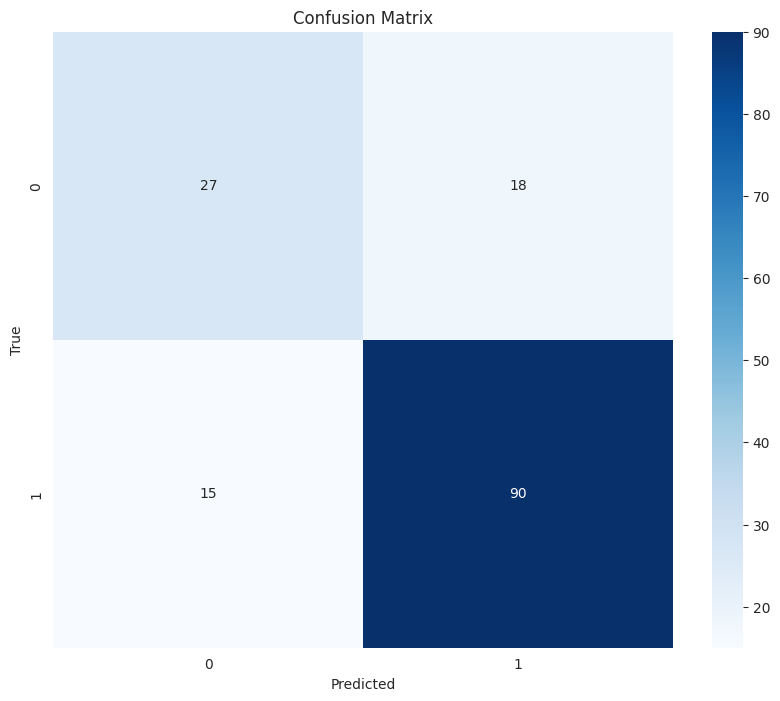

In [11]:
y_test_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")
recall = recall_score(y_test, y_test_pred, average='weighted')
print(f"Weighted Recall: {recall:.4f}")
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Получаем имена классов
classes = final_model.classes_
plot_confusion_matrix(cm, classes)


In [12]:
import shap

# Инициализация explainer
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

print("Тип shap_values:", type(shap_values))
print("Форма shap_values:", shap_values.shape)

# Для многоклассовой - проверка вложенной структуры
if isinstance(shap_values, list):
    print("Число классов:", len(shap_values))
    print("Форма для класса 0:", shap_values[0].shape)

Тип shap_values: <class 'numpy.ndarray'>
Форма shap_values: (150, 12, 2)


Форма shap_values: (150, 12, 2)


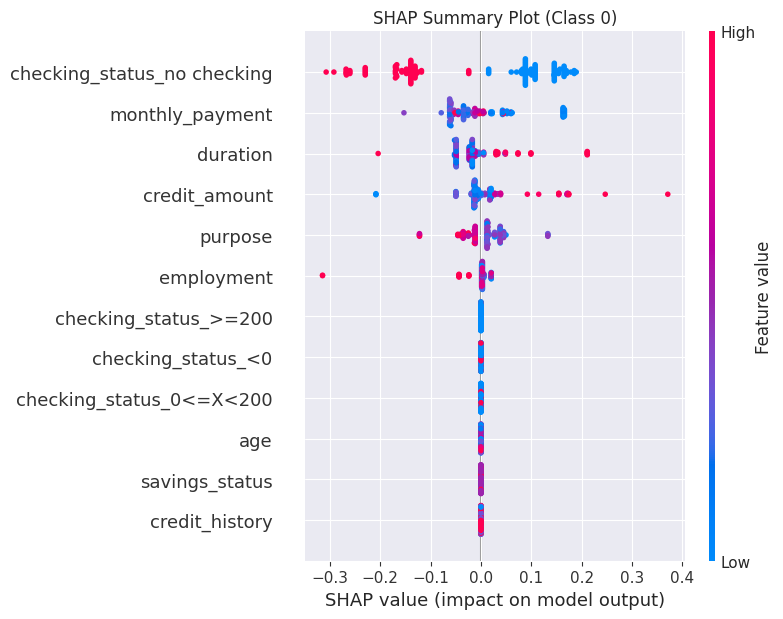

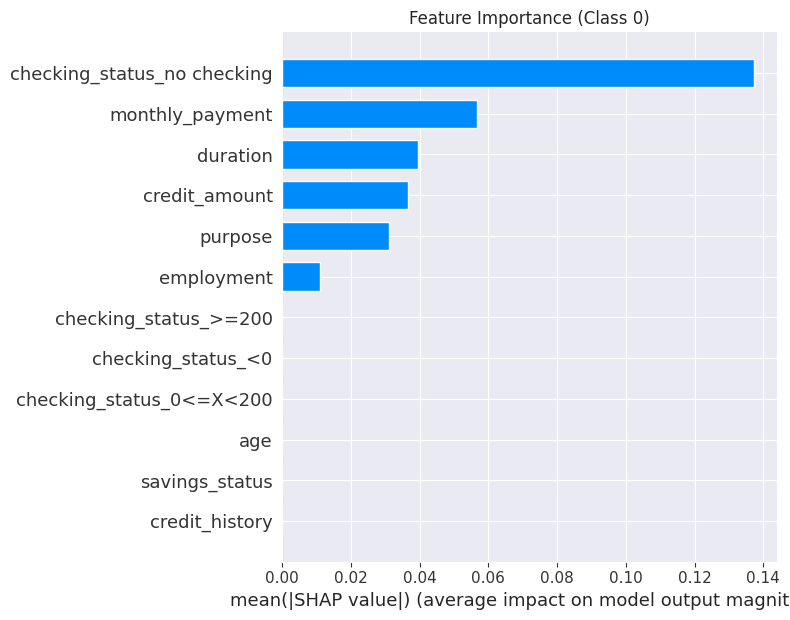

In [13]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

print("Форма shap_values:", shap_values.shape)  # (150, 12, 2)

class_idx = 0  # Выбираем класс (0 - good или 1 - bad)

shap.summary_plot(
    shap_values[:, :, class_idx],  # Выбираем срез для конкретного класса
    X_test,
    feature_names=X_test.columns,
    plot_type="dot",
    show=False
)
plt.title(f"SHAP Summary Plot (Class {class_idx})")
plt.tight_layout()
plt.show()

shap.summary_plot(
    shap_values[:, :, class_idx],
    X_test,
    plot_type="bar",
    show=False
)
plt.title(f"Feature Importance (Class {class_idx})")
plt.tight_layout()
plt.show()

In [19]:
np.savez_compressed(
    'shap_values.npz',
    shap_values=np.array(shap_values),
    expected_value=explainer.expected_value,
    feature_names=np.array(X_test.columns.tolist(), dtype='object'),
    class_names=np.array(final_model.classes_.tolist(), dtype='object'),
    X_test=X_test.values,
    y_test=y_test.values
)

In [17]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(final_model,f)